<a href="https://colab.research.google.com/github/NnamdiOdozi/Python/blob/master/SWYieldCurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# File to wrangle with Quant Analysis Paper
!pip install yfinance
!pip install yahoofinancials
#!pip install pandas_datareader
!pip install kaggle
#!pip install summarytools
!pip install pyxirr
!pip install pandas


import pyxirr
import timeit
#from summarytools import dfSummary
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib as mpb
import jinja2
import numpy as np 
import math
from sklearn.linear_model import LinearRegression
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt # Can also use plotly
import matplotlib.animation as animation
#from pandas_datareader import data as web
import yfinance as yf
from yahoofinancials import YahooFinancials
from scipy.interpolate import interp1d
import scipy.stats as stats
import statsmodels.api as sm
#matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.2 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

# New Section

In [5]:
df_yieldcurves = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/SW Spot Curve History.xlsx', sheet_name='UFR3', index_col=0, parse_dates=False)
#df_yieldcurves.index = pd.to_datetime(df_yieldcurves.index)

In [4]:
df_yieldcurves

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr,...,111yr,112yr,113yr,114yr,115yr,116yr,117yr,118yr,119yr,120yr
2015-01-05,0.163696,0.154628,0.155098,0.154405,0.156239,0.155682,0.156804,0.154952,0.154544,0.155242,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.12421,0.123105,0.122018
2015-01-06,0.162512,0.155531,0.155325,0.154462,0.156189,0.155732,0.156930,0.154868,0.154263,0.154777,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.12421,0.123105,0.122018
2015-01-07,0.163164,0.158613,0.159226,0.157562,0.158763,0.157613,0.158240,0.155378,0.154059,0.153927,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.12421,0.123105,0.122018
2015-01-08,0.160794,0.159271,0.159305,0.158005,0.159502,0.158199,0.158762,0.157053,0.156825,0.157721,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.12421,0.123105,0.122018
2015-01-09,0.156487,0.158805,0.159119,0.157356,0.158528,0.157662,0.158607,0.157292,0.157427,0.158668,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.12421,0.123105,0.122018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27,0.097414,0.123977,0.128301,0.132376,0.137020,0.136890,0.138118,0.138624,0.140271,0.142988,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.12421,0.123105,0.122018
2021-05-28,0.097414,0.123519,0.127850,0.130588,0.134289,0.136009,0.138786,0.139243,0.140821,0.143484,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.12421,0.123105,0.122018
2021-05-31,0.097519,0.123397,0.126147,0.129629,0.133842,0.135210,0.137681,0.138763,0.140923,0.144127,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.12421,0.123105,0.122018
2021-06-01,0.097623,0.123390,0.126142,0.129395,0.133437,0.134728,0.137137,0.138500,0.140922,0.144373,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.12421,0.123105,0.122018


In [7]:
df_yieldcurves.describe([.005,.05,.25, .5, .75, .95, .995])

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr,...,111yr,112yr,113yr,114yr,115yr,116yr,117yr,118yr,119yr,120yr
count,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,...,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000
mean,0.131359,0.129043,0.129767,0.131703,0.134897,0.136423,0.139038,0.139162,0.140368,0.142457,...,0.126372,0.125470,0.124565,0.123665,0.122765,0.121868,0.120967,0.120063,0.119164,0.118272
std,0.063011,0.044235,0.038108,0.034128,0.032384,0.029609,0.028083,0.026876,0.026294,0.026174,...,0.014310,0.013933,0.013566,0.013212,0.012870,0.012538,0.012215,0.011900,0.011593,0.011297
min,0.002602,0.012905,0.013776,0.024905,0.030147,0.034383,0.035866,0.039101,0.041506,0.043038,...,0.063184,0.063122,0.063060,0.063000,0.062941,0.062882,0.062825,0.062769,0.062713,0.062659
0.5%,0.003303,0.015229,0.016978,0.026467,0.032359,0.035352,0.038357,0.040659,0.042522,0.044538,...,0.067078,0.067050,0.067023,0.066996,0.066967,0.066939,0.066911,0.066884,0.066857,0.066831
5%,0.022033,0.033404,0.041824,0.052946,0.061807,0.071266,0.079032,0.084423,0.086214,0.090005,...,0.092866,0.092846,0.092827,0.092808,0.092790,0.092772,0.092754,0.092736,0.092719,0.092702
25%,0.081873,0.103215,0.110344,0.118075,0.125833,0.126769,0.128147,0.128405,0.129090,0.131324,...,0.128573,0.128559,0.128545,0.128532,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018
50%,0.145423,0.143933,0.144428,0.144019,0.145823,0.145691,0.146764,0.146086,0.146826,0.148738,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018
75%,0.168692,0.157951,0.155016,0.154762,0.157184,0.156922,0.158168,0.157289,0.158510,0.160565,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018
95%,0.222720,0.179455,0.167951,0.165351,0.166242,0.165586,0.167272,0.167093,0.168271,0.170975,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018


In [4]:
df_yieldcurves.describe()
df_yieldcurves.info()
df_yieldcurves.min()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1582 entries, 2015-01-05 to 2021-06-02
Columns: 120 entries, 1yr to 120yr
dtypes: float64(120)
memory usage: 1.5 MB


1yr      0.002602
2yr      0.012905
3yr      0.013776
4yr      0.024905
5yr      0.030147
           ...   
116yr    0.062882
117yr    0.062825
118yr    0.062769
119yr    0.062713
120yr    0.062659
Length: 120, dtype: float64

In [20]:

df2= df_yieldcurves[['2yr', '10yr']]
Mask = df_yieldcurves['2yr'] > df_yieldcurves['10yr']
df2.loc[Mask, 'Inverted'] = 'True'
df2

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,2yr,10yr,Inverted
2015-01-05,0.154628,0.155242,NaN
2015-01-06,0.155531,0.154777,True
2015-01-07,0.158613,0.153927,True
2015-01-08,0.159271,0.157721,True
2015-01-09,0.158805,0.158668,True
...,...,...,...
2021-05-27,0.123977,0.142988,NaN
2021-05-28,0.123519,0.143484,NaN
2021-05-31,0.123397,0.144127,NaN
2021-06-01,0.123390,0.144373,NaN


In [39]:
%timeit -n1 df2.apply(lambda x: x['2yr'] + x['10yr'], axis=1)


21.4 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
df_yieldcurves_max = df_yieldcurves.idxmax(axis=1)
df_yieldcurves_max


2015-01-05     1yr
2015-01-06     1yr
2015-01-07     1yr
2015-01-08    20yr
2015-01-09    20yr
              ... 
2021-05-27    15yr
2021-05-28    15yr
2021-05-31    15yr
2021-06-01    15yr
2021-06-02    15yr
Length: 1582, dtype: object

In [22]:
# Uche help me with this error!

print(df_yieldcurves[['1yr', '5yr','10yr', '20yr','30yr', '40yr']].asfreq('D').ffill().asfreq('M').head(30))
df_yieldcurves.resample('M').apply(lambda i: i.iloc[-1])
#df_yieldcurves.resample('M').mean()

                 1yr       5yr      10yr      20yr      30yr      40yr
2015-01-31  0.162191  0.158367  0.156360  0.160929  0.157469  0.155698
2015-02-28  0.167291  0.165983  0.165851  0.171746  0.167524  0.165362
2015-03-31  0.162296  0.155377  0.159311  0.162502  0.158615  0.156631
2015-04-30  0.149806  0.145607  0.150712  0.152529  0.149190  0.147489
2015-05-31  0.145517  0.144368  0.148724  0.150268  0.147048  0.145407
2015-06-30  0.146283  0.155832  0.155211  0.158628  0.155131  0.153344
2015-07-31  0.152824  0.152901  0.158810  0.161613  0.157721  0.155735
2015-08-31  0.159296  0.165507  0.165814  0.170957  0.166661  0.164465
2015-09-30  0.144038  0.157062  0.160503  0.163654  0.159650  0.157607
2015-10-31  0.112876  0.136549  0.152869  0.151219  0.147208  0.145175
2015-11-30  0.051365  0.115950  0.119818  0.118388  0.116407  0.115404
2015-12-31  0.085893  0.115549  0.116228  0.115267  0.113560  0.112694
2016-01-31  0.095302  0.126614  0.124866  0.124492  0.122481  0.121459
2016-0

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr,...,112yr,113yr,114yr,115yr,116yr,117yr,118yr,119yr,120yr,inverted
2015-01-31,0.162191,0.157297,0.158295,0.156942,0.158367,0.157531,0.158457,0.156386,0.155803,0.156360,...,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018,True
2015-02-28,0.167291,0.171749,0.169825,0.165982,0.165983,0.165073,0.166163,0.164585,0.164604,0.165851,...,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018,False
2015-03-31,0.162296,0.155201,0.155497,0.154064,0.155377,0.154378,0.155201,0.155346,0.156825,0.159311,...,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018,True
2015-04-30,0.149806,0.145655,0.145379,0.144304,0.145607,0.145202,0.146331,0.146735,0.148293,0.150712,...,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018,True
2015-05-31,0.145517,0.143444,0.144105,0.143099,0.144368,0.143015,0.143328,0.144124,0.146023,0.148724,...,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28,0.023849,0.064706,0.071011,0.080775,0.088315,0.103130,0.116728,0.118284,0.120259,0.122862,...,0.116879,0.116854,0.116829,0.116804,0.116780,0.116756,0.116733,0.116710,0.116687,False
2021-03-31,0.066060,0.064576,0.078357,0.096093,0.109564,0.111288,0.113391,0.114197,0.115684,0.117814,...,0.118858,0.118823,0.118788,0.118754,0.118721,0.118688,0.118656,0.118624,0.118593,False
2021-04-30,0.082055,0.109582,0.114935,0.124125,0.132204,0.131293,0.131742,0.132844,0.134990,0.138106,...,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018,False
2021-05-31,0.097519,0.123397,0.126147,0.129629,0.133842,0.135210,0.137681,0.138763,0.140923,0.144127,...,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018,False


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

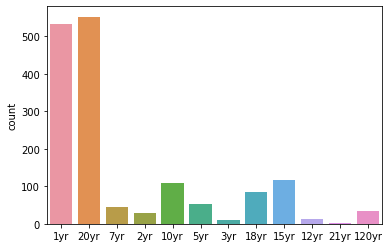

In [8]:
# How do I make this bar plot work

sns.countplot(df_yieldcurves_max)                 
#df_yieldcurves_max.plot.bar()
#dfSummary(df_yieldcurves)

In [9]:
df_yieldcurves_d1 = df_yieldcurves.diff(1)
df_yieldcurves_d10 = df_yieldcurves.diff(10)
df_yieldcurves_d30 = df_yieldcurves.diff(30)
df_yieldcurves_d30.mean()
df_yieldcurves_d30.describe()
#print(df_yieldcurves_d1.quantile(0.995), df_yieldcurves_d10.quantile(0.995), df_yieldcurves_d30.quantile(0.995))

logMonthChanges = np.log(df_yieldcurves.pct_change(-30) + 1)
#logMonthChanges = np.log(df_yieldcurves.shift(30, fill_value=np.NaN)/df_yieldcurves)
logMonthChanges[['10yr', '20yr','30yr', '40yr']].head()


,10yr,20yr,30yr,40yr
2015-01-05,-0.178402,-0.175800,-0.162777,-0.155899
2015-01-06,-0.161450,-0.150488,-0.137950,-0.131361
2015-01-07,-0.160851,-0.156482,-0.144572,-0.138305
2015-01-08,-0.095758,-0.098797,-0.092498,-0.089169
2015-01-09,-0.057299,-0.067326,-0.064715,-0.063311


In [10]:
logMonthChanges_1_in_200Up = logMonthChanges.quantile(0.995)
logMonthChanges_1_in_200Down = logMonthChanges.quantile(0.005)

print(logMonthChanges_1_in_200Up[['1yr', '3yr', '5yr','10yr', '20yr','30yr', '40yr']]
, '\n', logMonthChanges_1_in_200Down[['1yr', '3yr', '5yr','10yr', '20yr','30yr', '40yr']])

#for 

#print(logMonthChanges[column])

1yr     1.931325
3yr     0.815012
5yr     0.639568
10yr    0.849717
20yr    0.611849
30yr    0.511539
40yr    0.464547
Name: 0.995, dtype: float64 
 1yr    -1.721565
3yr    -0.936591
5yr    -0.721475
10yr   -0.565016
20yr   -0.526924
30yr   -0.406839
40yr   -0.420171
Name: 0.005, dtype: float64


I still need to do a few things in this section:

expanding and rolling windows
level-dependent volatilities
Downsampling the data to be month-end and quarter-end data 

In [11]:
# This computes level-dependant stresses for the 1-yr tenor. How do I generalise this to be in a table for all tenors?
mask_high = df_yieldcurves > 0.15
mask_high
mask_low  = df_yieldcurves < 0.075


logMonthChanges_1_in_200Up_H = logMonthChanges[mask_high].quantile(0.995)
logMonthChanges_1_in_200Down_H = logMonthChanges[mask_high].quantile(0.005)

logMonthChanges_1_in_200Up_L = logMonthChanges[mask_low].quantile(0.995)
logMonthChanges_1_in_200Down_L = logMonthChanges[mask_low].quantile(0.005)


print(logMonthChanges_1_in_200Up_H[['1yr', '3yr', '5yr','10yr', '20yr','30yr', '40yr']]
, '\n', logMonthChanges_1_in_200Down_H[['1yr', '3yr', '5yr','10yr', '20yr','30yr', '40yr']])

print(logMonthChanges_1_in_200Up_L[['1yr', '3yr', '5yr','10yr', '20yr','30yr', '40yr']]
, '\n', logMonthChanges_1_in_200Down_L[['1yr', '3yr', '5yr','10yr', '20yr','30yr', '40yr']])


#print(logMonthChanges['1yr'][mask_high].quantile(0.995), logMonthChanges['1yr'][mask_low].quantile(0.995))

1yr     0.472884
3yr     0.437757
5yr     0.271981
10yr    0.289922
20yr    0.409932
30yr    0.379255
40yr    0.342114
Name: 0.995, dtype: float64 
 1yr    -0.341637
3yr    -0.171292
5yr    -0.092862
10yr   -0.105817
20yr   -0.149536
30yr   -0.132207
40yr   -0.155547
Name: 0.005, dtype: float64
1yr     2.082951
3yr     1.002345
5yr     0.738198
10yr    0.403651
20yr    0.149290
30yr    0.115837
40yr    0.100772
Name: 0.995, dtype: float64 
 1yr    -1.793226
3yr    -1.114765
5yr    -0.741553
10yr   -0.638401
20yr   -0.619323
30yr   -0.516333
40yr   -0.467265
Name: 0.005, dtype: float64


# Video of Yield Curve

In [27]:
maturities = ['1yr','3yr','5yr','7yr','10yr', '15yr', '20yr', '30yr', '50yr']
data = df_yieldcurves
data['inverted'] = data['10yr'] < data['1yr']
#df = df_yieldcurves[limited_maturities]
#df.head()

TypeError: ignored

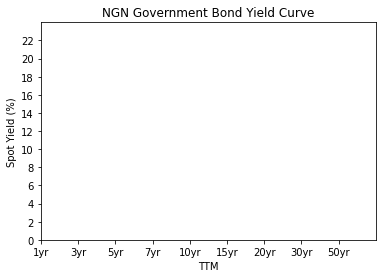

In [40]:
# Initialize figure 
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
line, =ax.plot([], [])

# Set the range of ticks
ax.set_xlim(0,9)
ax.set_ylim(0,24)

# Set the tick locations
ax.set_xticks(range(9))
ax.set_yticks(range(0,24,2))

# Set the axis labels
ax.set_xticklabels(maturities)
ax.set_yticklabels(range(0,24,2))

#ax.yaxis.set_label_positions("left")
#ax.yaxis.tick_left()

plt.ylabel("Spot Yield (%)")
plt.xlabel("TTM")


def init_func():
  line.set_data([], [])
  plt.title("NGN Government Bond Yield Curve")
  return line

def animate(i):
  x=range(0, len(maturities))
  y=data[maturities].iloc[i]
  dt_ = data.index[i].strftime("%Y-%m-%d")

  if data.inverted.iloc[i]:
    line.set_colour("r")
  else:
    line.set_color("y")

  line.set_data(x,y)

  plt.title(f"NGN Government Bond Yield Curve ({dt_})")
  return line,

ani = animation.FuncAnimation(
    fig, 
    animate,
    init_func=init_func,
    frames=len(data.index),
    interval=5,
    blit=True
)


In [ ]:
'''# Initialize figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot([], [])

# Set the range of ticks
ax.set_xlim(0, 7)
ax.set_ylim(0, 20)

# Set the tick locations
ax.set_xticks(range(8))
ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18])

# Set the axis labels
ax.set_xticklabels(["1m","3m","6m","1y","5y","10y","20y","30y"])
ax.set_yticklabels([2, 4, 6, 8, 10, 12, 14, 16, 18])

# Force the y-axis labels to the left
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()

# Add the axis lables
plt.ylabel("Yield (%)")
plt.xlabel("Time to maturty")
#Next, build the animation functions.

def init_func():
    line.set_data([], [])
    plt.title("U.S. Treasury Bond Yield Curve")
    return line

def animate(i):
    x = range(0, len(maturities))
    y = data[maturities].iloc[i]
    dt_ = data.index[i].strftime("%Y-%m-%d")
    
    if data.inverted.iloc[i]:
        line.set_color("r")
    else:
        line.set_color("y")
    
    line.set_data(x, y)
    
    plt.title(f"U.S. Treasury Bond Yield Curve ({dt_})")
    return line,

ani = animation.FuncAnimation(
    fig, 
    animate,
    init_func=init_func,
    frames=len(data.index),
    interval=5,
    blit=True
)
'''

# PCA on Yield Curve

In [ ]:
# Standardisation
X = df_yieldcurves[maturities]
#df = x.drop(axis=1,columns=[‘Date’])
#X = df.values
#Normalization of the data
print(X.head())
#X = scale(X) #Note that it it possible to scale and retain the data in a dataframe rather than in a numpy array
print(X)
X = pd.DataFrame(X, index = df_yieldcurves.index, columns = maturities)
X.head()

In [ ]:
# Computing factor loadings and contribution of variance

pca=PCA(n_components=9)
pca.fit(X)
factor_loading = pca.components_
df_factor_loading = pd.DataFrame(factor_loading)
print(df_factor_loading)
pd.DataFrame(pca.fit_transform(X))
pd.DataFrame(pca.fit_transform(X)).var()

In [ ]:
# variance percent of each PC
variance_percent_df = pd.DataFrame(data=pca.explained_variance_)
variance_ratio_df = pd.DataFrame(data=pca.explained_variance_ratio_)
variance_ratio_df = variance_ratio_df * 100
print(variance_ratio_df)

In [ ]:
df_factor_loading.var()

# Generating Bond Cashflows

In [ ]:
df_Bonds = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/28.02.1 FMDQ DQL _ Yield Interpolations JUN.22 - FEB.23.xlsx', sheet_name='Yields(TBills,Bonds) FEB23.28', parse_dates=True, skiprows=27, usecols='R:Z')
df_Bonds['Settlement_Date'] = '2023-02-28'

df_Bonds.head(20)



In [ ]:
# Generate a new dataframe here going out 30 years where rows are monthly buckets. Each bond above will be a column in the dataframe

df_C = pd.DataFrame(index = pd.date_range(start='2023-04-30', end='2053-03-31', freq='M'),data=0, columns=df_Bonds['Maturity Date'])

df_C

In [ ]:
# Generating CF matrix for 100 nominal of each bond ...

df_C[:] = 0
for c in range(len(df_Bonds)):
  coupon = df_Bonds['Coupon (%)'][c]
  column = df_Bonds['Maturity Date'][c]

  for index, row in df_C[column].items():
    if ((index.month == df_C[column].name.month or index.month == (df_C[column].name.month + 6) % 12) and  index < df_C[column].name):
      df_C[column][index] = coupon/2
    if (index.month == df_C[column].name.month and index.year == df_C[column].name.year):
      df_C[column][index] = 100 +  coupon/2


In [ ]:
df_C

In [ ]:
for index, row in df_Bonds.iterrows():
  coupon = row['Coupon (%)']
  print(coupon)